Import Libraries


In [38]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import datetime, math
from datetime import date, timedelta
from keras.utils import plot_model
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import set_random_seed
from tensorflow.keras import losses, optimizers
from sklearn.impute import SimpleImputer
from keras.preprocessing.sequence import TimeseriesGenerator

In [39]:
#Loading Data
ticker = "BARC.L"
data = yf.download(ticker, start="2004-01-01", end="2024-06-30")

[*********************100%%**********************]  1 of 1 completed


In [40]:
#Data Cleaning
data.reset_index(inplace=True)
data.dropna(inplace=True)

#Handling missing values in a more robust way
imputer = SimpleImputer(strategy='mean')
data['Close'] = imputer.fit_transform(data[['Close']])

#Splitting Data
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

#Scaling Data
scaler = MinMaxScaler(feature_range=(0,1))
data_train_scale = scaler.fit_transform(data_train)
data_test_scale = scaler.transform(data_test)

#Creating Training Sequences:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

x, y = np.array(x), np.array(y)


In [41]:
# Splitting the training data into training and validation sets
split_idx = int(len(x) * 0.8)
x_train, y_train = x[:split_idx], y[:split_idx]
x_val, y_val = x[split_idx:], y[split_idx:]

In [42]:
# #from keras.models import load_model
# import tensorflow as tf

# # Load the saved LSTM model
# lstm_model = tf.keras.models.load_model("/content/sample_data/Test_1.keras")

In [43]:
#Building the LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,input_shape = ((x.shape[1],1))))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
lstm_model.add(Dropout(0.3))

lstm_model.add(LSTM(units = 100, activation = 'relu'))
lstm_model.add(Dropout(0.4))

lstm_model.add(Dense(units =1))
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [44]:
# from tensorflow.keras import losses, optimizers
# from tensorflow.keras.callbacks import EarlyStopping

# # Fitting the model to the training data
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# lstm_model.fit(x,y, epochs = 100, batch_size =32, verbose =1)


# Fitting the model to the training data with validation data
history = lstm_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val), verbose=1)


Epoch 1/100
102/102 [==============================] - 22s 173ms/step - loss: 0.0256 - val_loss: 7.7562e-04
Epoch 2/100
102/102 [==============================] - 20s 193ms/step - loss: 0.0056 - val_loss: 6.7800e-04
Epoch 3/100
102/102 [==============================] - 17s 171ms/step - loss: 0.0052 - val_loss: 2.6564e-04
Epoch 4/100
102/102 [==============================] - 17s 169ms/step - loss: 0.0051 - val_loss: 2.8784e-04
Epoch 5/100
102/102 [==============================] - 17s 167ms/step - loss: 0.0043 - val_loss: 1.8275e-04
Epoch 6/100
102/102 [==============================] - 19s 183ms/step - loss: 0.0042 - val_loss: 2.4758e-04
Epoch 7/100
102/102 [==============================] - 17s 168ms/step - loss: 0.0044 - val_loss: 4.5400e-04
Epoch 8/100
102/102 [==============================] - 17s 169ms/step - loss: 0.0040 - val_loss: 3.5926e-04
Epoch 9/100
102/102 [==============================] - 19s 187ms/step - loss: 0.0035 - val_loss: 4.0323e-04
Epoch 10/100
102/102 [======

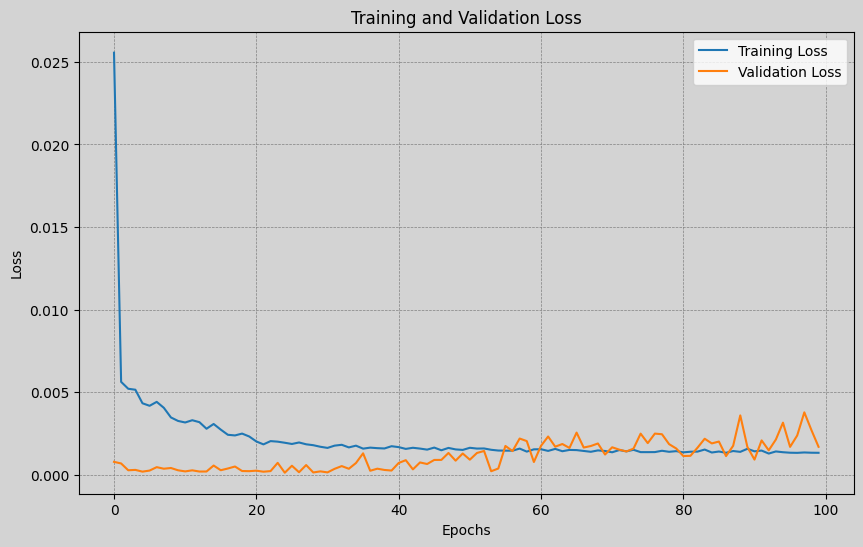

In [45]:
# Plot training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

In [46]:
lstm_model.save("/content/sample_data/Test_1.keras")

In [47]:
#Summarizing the Model architecture
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               72400     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                

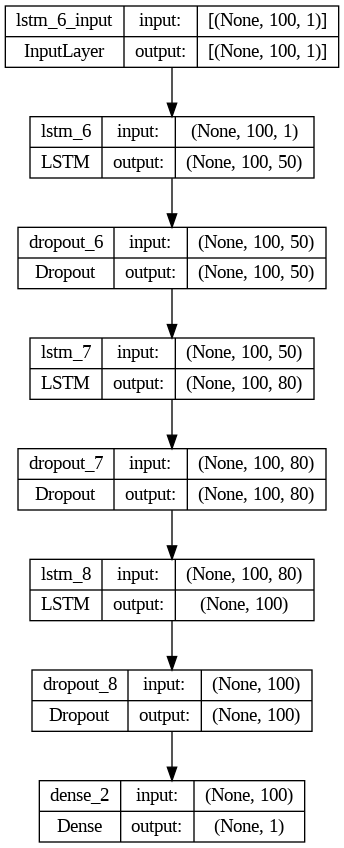

In [48]:
from keras.utils import plot_model
plot_model(lstm_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

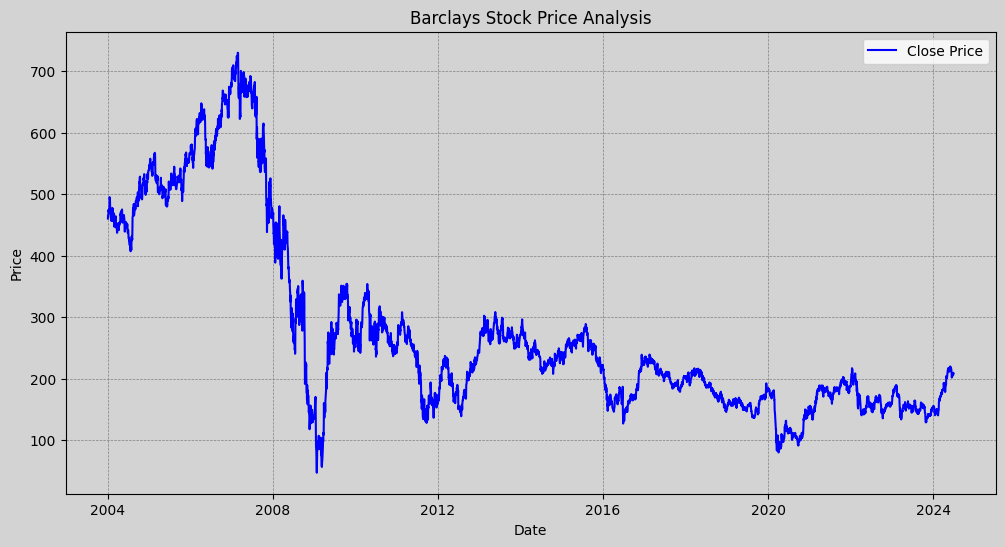

In [49]:
plt.figure(figsize=(12, 6))  # Set the figure size

# Plotting the closing price
plt.plot(data["Date"], data["Close"], label='Close Price', color='blue')
plt.title("Barclays Stock Price Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')  # Plot background
plt.gcf().set_facecolor('lightgray')  # Figure background
plt.legend()
plt.show()

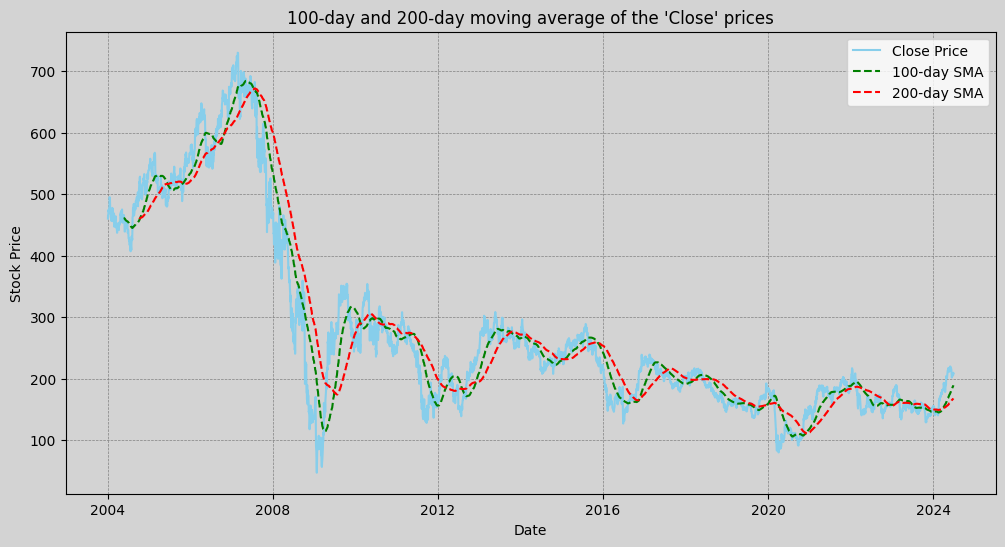

In [50]:
#Calculating and plotting the 100-day and 200-day moving average of the 'Close' prices
data['SMA_100'] = data['Close'].rolling(window=100).mean()  # 100-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average

plt.figure(figsize=(12,6))
plt.plot(data["Date"], data["Close"], label='Close Price',  color='skyblue')
plt.plot(data["Date"], data['SMA_100'], label='100-day SMA',linestyle='--', color='g')
plt.plot(data["Date"], data['SMA_200'], label='200-day SMA',linestyle='--', color='r')
plt.title("100-day and 200-day moving average of the 'Close' prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.legend()
plt.show()

In [51]:
#Extracting the Last 100 Days of Training Data
pas_100_days = data_train.tail(100)

#Combining with Test Data
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

#Scaling the Test Data
data_test_scale  =  scaler.fit_transform(data_test)

#Initializing Lists and Generating Sequences from Scaled Test Data
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

33/33 [==============================] - 4s 120ms/step
Root Mean Squared Error: 7.854084216299844


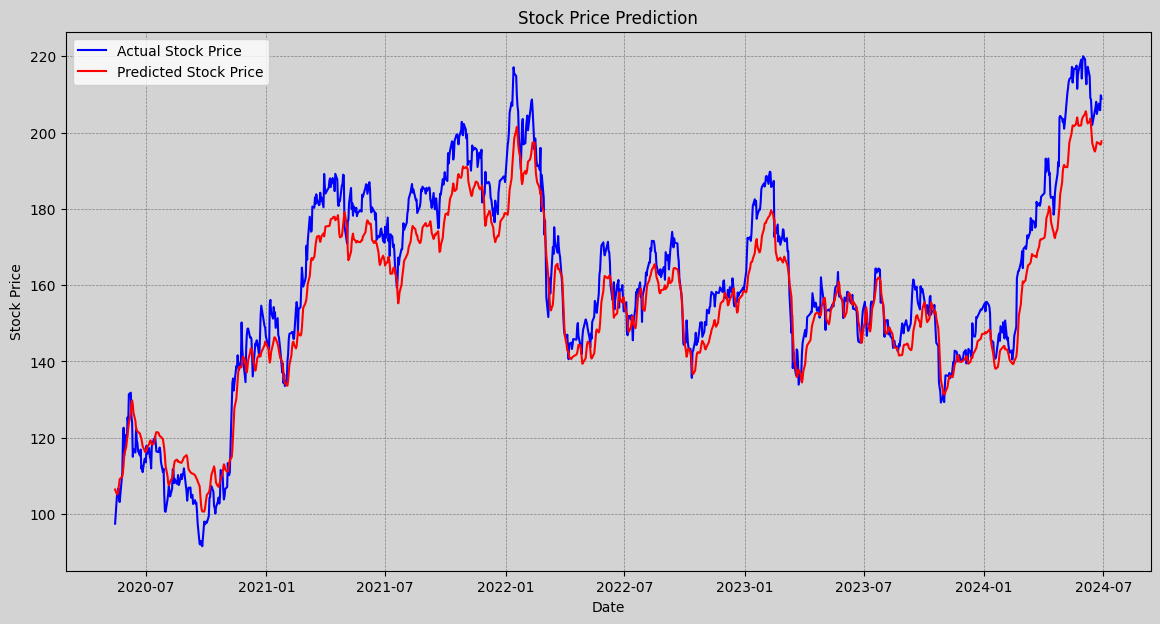

1/1 [==============================] - 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step


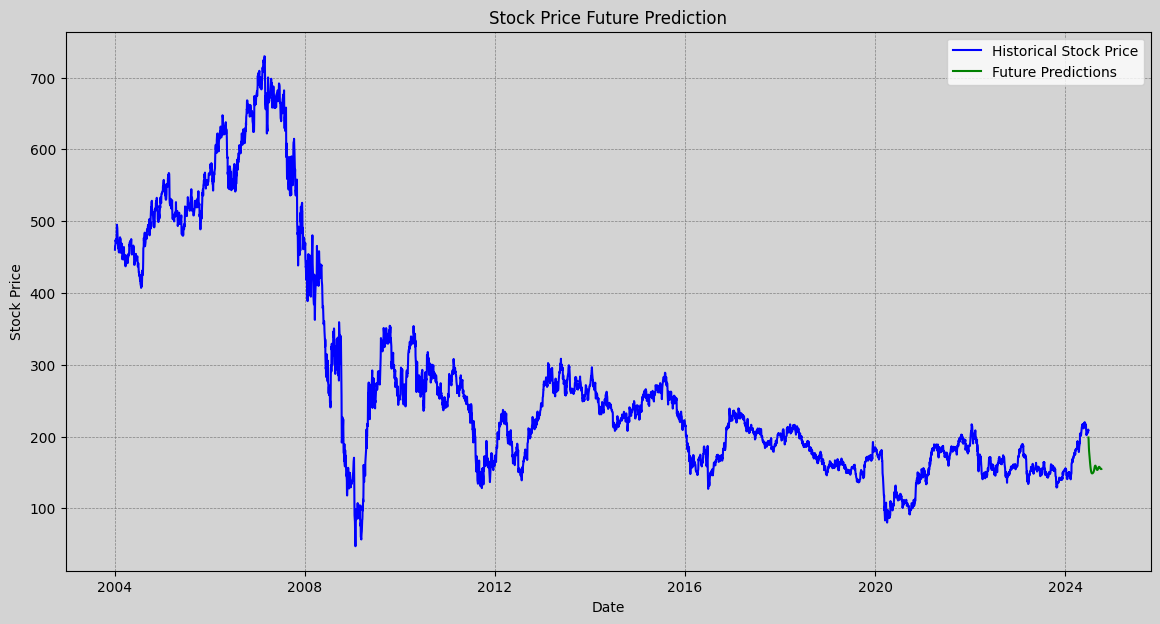

In [60]:
# Predicting on the Test Data
predictions = lstm_model.predict(x)

# Inverse Transforming the Predictions and Actual Values to Original Scale
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Calculating the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_actual, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Plotting the Predictions and Actual Values
plt.figure(figsize=(14,7))
plt.plot(data['Date'][len(data_train):len(data_train) + len(y_actual)], y_actual, color='blue', label='Actual Stock Price')
plt.plot(data['Date'][len(data_train):len(data_train) + len(predictions)], predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

# Future Prediction Code
# Ensure correct scaling and transformation of the last 100 days
last_100_days = data['Close'].values[-100:].reshape(-1, 1)
last_100_days_scaled = scaler.transform(last_100_days)

# Ensure correct shape of the input data
current_input = last_100_days_scaled.reshape(1, last_100_days_scaled.shape[0], last_100_days_scaled.shape[1])

# Number of future days to predict
future_days = 100

# Generating future predictions
future_predictions = []

for _ in range(future_days):
    future_pred = lstm_model.predict(current_input)
    future_predictions.append(future_pred[0, 0])
    current_input = np.append(current_input[:, 1:, :], future_pred.reshape(1, 1, 1), axis=1)

# Inverse transform the future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
last_date = data['Date'].iloc[-1]
future_dates = pd.date_range(last_date + timedelta(1), periods=future_days).tolist()

# Plotting the future predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Historical Stock Price')
plt.plot(future_dates, future_predictions, color='green', label='Future Predictions')
plt.title('Stock Price Future Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()



DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8fpnj33/j4ywtmwp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpm8fpnj33/0_uer3ii.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80834', 'data', 'file=/tmp/tmpm8fpnj33/j4ywtmwp.json', 'init=/tmp/tmpm8fpnj33/0_uer3ii.json', 'output', 'file=/tmp/tmpm8fpnj33/prophet_model6f0sue6p/prophet_model-20240722232132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:21:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:21:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


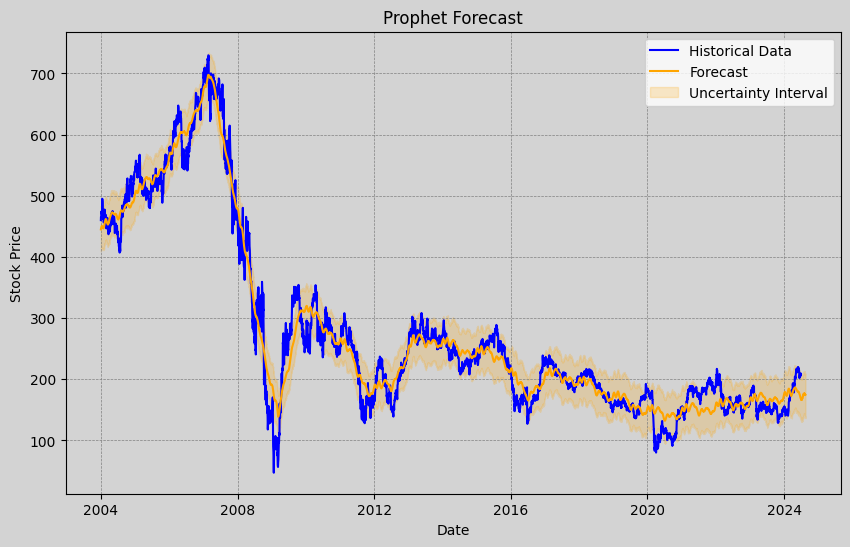

In [57]:
import matplotlib.pyplot as plt
from prophet import Prophet

# Prepare the data for Prophet
prophet_data = data[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_data)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=future_days)
forecast = prophet_model.predict(future)

# Plot the forecast with custom colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot historical data
ax.plot(prophet_data['ds'], prophet_data['y'], label='Historical Data', color='blue')

# Plot forecasted data
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')

# Plot uncertainty intervals
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Uncertainty Interval')

# Customize the plot
plt.title('Prophet Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
# Display the plot
plt.show()


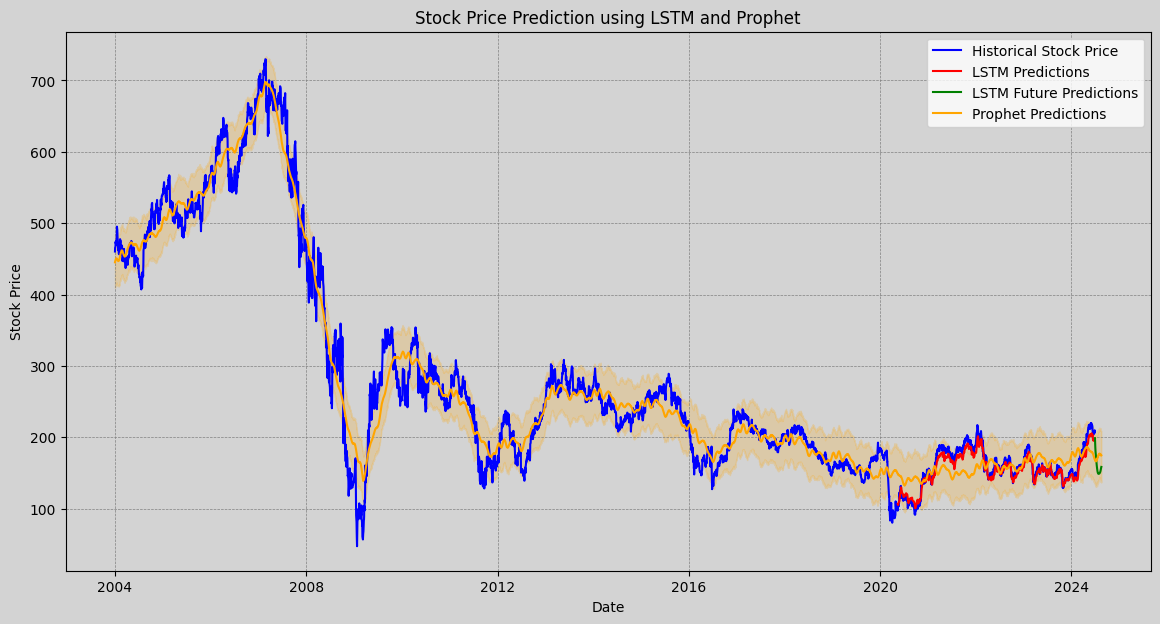

In [58]:
# Combine LSTM and Prophet predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], color='blue', label='Historical Stock Price')
plt.plot(data['Date'][len(data_train):len(data_train) + len(predictions)], predictions, color='red', label='LSTM Predictions')
plt.plot(future_dates, future_predictions, color='green', label='LSTM Future Predictions')
plt.plot(forecast['ds'], forecast['yhat'], color='orange', label='Prophet Predictions')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
plt.title('Stock Price Prediction using LSTM and Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
plt.gca().set_facecolor('lightgray')
plt.gcf().set_facecolor('lightgray')
plt.show()

In [59]:
y_test_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Printing the prediction and the actual close value for comparison
comparison_df = pd.DataFrame({
    'Date': data['Date'][len(data_train):len(data_train) + len(y_test_actual)],
    'Actual': y_test_actual.flatten(),
    'Predicted': predictions.flatten()
})

comparison_df

,Date,Actual,Predicted
4153,2020-05-15,97.449997,106.418915
4154,2020-05-18,105.199997,105.138290
4155,2020-05-19,104.720001,105.316437
4156,2020-05-20,106.720001,106.277962
4157,2020-05-21,103.919998,107.713829
...,...,...,...
5187,2024-06-24,207.550003,197.186554
5188,2024-06-25,206.149994,197.019730
5189,2024-06-26,205.850006,196.860565
5190,2024-06-27,209.750000,196.860077
